In [1]:
import pandas as pd
import numpy as np
import os
import glob

from datetime import date

import datetime
import timedelta
import os

c:\users\jhpark1\anaconda3\envs\tc\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\jhpark1\anaconda3\envs\tc\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\jhpark1\anaconda3\envs\tc\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
date_all = pd.DataFrame(pd.date_range('1997-1-1', datetime.datetime.now().isoformat()[:10]).astype(str), columns=['date'])

res_list = ['kospi', 'gold', 'KOSPI_시가총액', 'hang-sen-40','aud-chf', 'nq-100','volatility-s-p-500', 'us-dollar-index', 'us-spx-500'
           ,'투자자예탁금_(장내파생상품 거래예수금제외)', 'KOSPI_거래량', 'KOSPI_거래대금','kosdaq', 'KOSDAQ_외국인순매수', 'KOSPI_외국인순매수']

In [3]:
from tqdm import tqdm_notebook
# path = "D:/시세모니터링/융합분석/DATA/" + datetime.datetime.now().isoformat()[:10].replace("-","") + "/"
path = "D:/시세모니터링/융합분석/DATA/20200921/"
file = glob.glob(path+ "\\*.csv")

pre_data = date_all

for i in tqdm_notebook(file):
        
    if (i.split("\\")[1].split(".csv")[0] in res_list) == True:
        list_temp = pd.read_csv(i)
        list_temp = list_temp.iloc[:,:2]
        list_temp = list_temp.rename(columns={"Date" : 'date'})

        pre_data = pd.merge(pre_data, list_temp, how = 'inner')
pre_data

c:\users\jhpark1\anaconda3\envs\tc\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,date,aud-chf,gold,hang-sen-40,kosdaq,KOSDAQ_외국인순매수,kospi,KOSPI_거래대금,KOSPI_거래량,KOSPI_시가총액,KOSPI_외국인순매수,nq-100,us-dollar-index,us-spx-500,volatility-s-p-500,투자자예탁금_(장내파생상품 거래예수금제외)
0,2006-01-04,0.9538,533.9,15200.06,740.48,12,1402.11,68521,52000,6657770,1890,1695.83,88.910,1273.46,11.37,12579978.0
1,2006-01-05,0.9538,526.3,15271.13,736.66,0,1395.51,62111,52454,6624710,876,1705.29,89.080,1273.48,11.31,12796582.0
2,2006-01-06,0.9578,539.7,15344.44,747.10,-273,1412.78,60625,57724,6706130,131,1734.99,88.620,1285.45,11.00,13214262.0
3,2006-01-09,0.9623,549.1,15547.43,753.88,-303,1408.33,60198,52476,6685870,-1495,1741.90,89.000,1290.15,11.13,13552092.0
4,2006-01-10,0.9589,544.3,15569.91,744.71,-254,1396.29,56763,46869,6635130,842,1744.02,89.070,1289.69,10.86,13495040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,2020-09-11,0.6617,1947.9,24503.31,888.44,-1893,2396.69,118812,87203,16305320,-1513,11087.40,93.320,3340.97,26.87,56400312.0
3310,2020-09-14,0.6616,1963.7,24640.28,894.17,-107,2427.91,118683,95340,16521670,1439,11277.76,92.912,3383.54,25.85,56403371.0
3311,2020-09-15,0.6629,1966.2,24732.76,899.46,-297,2443.58,116982,83963,16626440,2504,11438.87,93.085,3401.20,25.59,56692063.0
3312,2020-09-16,0.6642,1970.5,24725.63,896.28,-70,2435.92,115664,75463,16572630,1751,11247.60,93.231,3385.49,26.04,55374237.0


In [4]:
# 2019-12-30 : 3148
pre_data["date"][3148]

# 2019-12-30 : 3148
pre_data["date"][3182]

'2020-03-02'

In [5]:
# pre_data_1 : 7일 이전 필터
pre_data_1 = pre_data[pre_data["date"] > (datetime.datetime.now() - datetime.timedelta(days=21)).isoformat()[:10]]
pre_data_1

,date,aud-chf,gold,hang-sen-40,kosdaq,KOSDAQ_외국인순매수,kospi,KOSPI_거래대금,KOSPI_거래량,KOSPI_시가총액,KOSPI_외국인순매수,nq-100,us-dollar-index,us-spx-500,volatility-s-p-500,투자자예탁금_(장내파생상품 거래예수금제외)
3304,2020-09-03,0.6612,1937.8,25007.60,874.13,-51,2395.90,171670,96640,16277020,1921,11771.37,92.733,3455.06,33.60,47396397.0
3305,2020-09-04,0.6649,1934.3,24695.45,866.04,-320,2368.25,194445,133562,16090980,-4715,11622.13,92.719,3426.96,30.75,63258152.0
3306,2020-09-08,0.6619,1943.2,24624.34,878.29,-696,2401.91,170084,96591,16332230,-337,11068.26,93.441,3331.84,31.46,59426245.0
3307,2020-09-09,0.6643,1954.9,24468.93,869.47,-353,2375.81,152449,92922,16154700,-1136,11395.85,93.258,3398.96,28.81,57224347.0
3308,2020-09-10,0.6606,1964.3,24313.54,884.30,154,2396.48,155881,105218,16302100,3821,11154.12,93.331,3339.19,29.71,57402133.0
3309,2020-09-11,0.6617,1947.9,24503.31,888.44,-1893,2396.69,118812,87203,16305320,-1513,11087.40,93.320,3340.97,26.87,56400312.0
3310,2020-09-14,0.6616,1963.7,24640.28,894.17,-107,2427.91,118683,95340,16521670,1439,11277.76,92.912,3383.54,25.85,56403371.0
3311,2020-09-15,0.6629,1966.2,24732.76,899.46,-297,2443.58,116982,83963,16626440,2504,11438.87,93.085,3401.20,25.59,56692063.0
3312,2020-09-16,0.6642,1970.5,24725.63,896.28,-70,2435.92,115664,75463,16572630,1751,11247.60,93.231,3385.49,26.04,55374237.0
3313,2020-09-17,0.6641,1949.9,24340.85,885.18,-314,2406.17,138648,83415,16369160,-1256,11080.95,92.969,3357.01,26.46,55662993.0


NameError: name 'tidx' is not defined

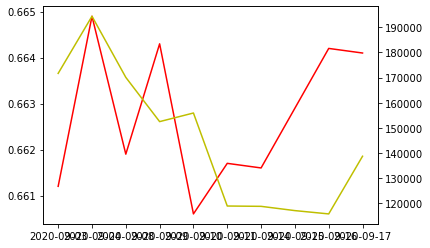

In [6]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 부분입력 변수
fit1 = "aud-chf"
fit2 = "KOSPI_거래대금"
# tidx = 3182

ax1.plot(pre_data_1["date"], pre_data_1[fit1], color = 'r')
ax2.plot(pre_data_1["date"], pre_data_1[fit2], color = 'y')

pre_data_1[[fit1, fit2]][tidx:].corr().iloc[0,1]

0.9719843081946985

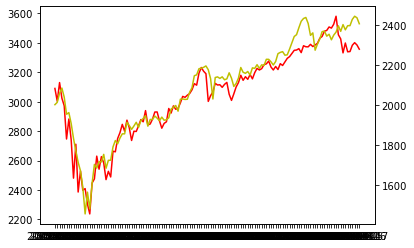

In [10]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 부분입력 변수
fit1 = "us-spx-500"
fit2 = "kospi"
tidx = 3182

ax1.plot(pre_data["date"][tidx:], pre_data[fit1][tidx:], color = 'r')
ax2.plot(pre_data["date"][tidx:], pre_data[fit2][tidx:], color = 'y')

pre_data[[fit1, fit2]][tidx:].corr().iloc[0,1]

0.9573903149838469

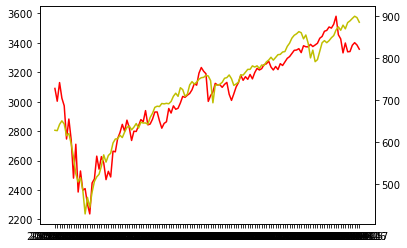

In [9]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 부분입력 변수
fit1 = "us-spx-500"
fit2 = "kosdaq"
tidx = 3182

ax1.plot(pre_data["date"][tidx:], pre_data[fit1][tidx:], color = 'r')
ax2.plot(pre_data["date"][tidx:], pre_data[fit2][tidx:], color = 'y')

pre_data[[fit1, fit2]][tidx:].corr().iloc[0,1]